In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 

In [2]:
df = pd.read_csv('summary_tr01.csv')
df.head()

,cif file,metal atom,total num of metal atoms,total num of hinge bonding,atoms in hinge bonding,total num of double bonding,atoms in double bonding,total num of scissors bonding,atoms in scissors bonding
0,qmof-1a36e21,Zn,4,16,"N, O, Cl",0.0,None,0,None
1,qmof-9d35285,Zn,16,64,O,0.0,None,0,None
2,qmof-a328797,Al,2,0,None,6.0,"O(44)-C(13)-O(47), O(55)-C(14)-O(51), O(54)-C(...",0,None
3,qmof-5e8c015,Ni,3,2,O,8.0,"N(165)-C(123)-N(169)-C(130)-N(168), N(166)-C(1...",0,None
4,qmof-1c7dc6d,Pr,4,28,"N, Cl",0.0,None,0,None


In [4]:
# First, let's filter some cases
# 1) If hinge bonding with H ,Cl, F 
# 2) If double bonding contains H, Cl,F in path
# 3) If scissors bonding contains H, Cl,F in path
# But to do that we need to know the number of bonds with H, Cl, F and so on :(


In [6]:
df['atoms in hinge bonding'].unique()

array(['N, O, Cl', 'O', 'None', 'N, Cl', 'N, O', 'N', 'C, N', 'S', 'N, S',
       'N, C', 'O, Cl', 'N, O, Br', 'F', 'F, O', 'N, F', 'H', 'N, H',
       'S, Cl', 'N, S, O', 'Cl', 'P, O', 'N, I', 'H, O', 'N, Te', 'N, Br',
       'C, O', 'Br', 'N, C, S', 'N, C, Cl', 'N, Se', 'N, C, H', 'O, Br',
       'S, O', 'N, P, S', 'N, C, O, I', 'N, F, O', 'N, C, O', 'P', 'C',
       'C, F, O', 'O, I', 'C, S, N', 'N, P, C', 'N, O, I', 'N, P',
       'N, P, Br', 'H, O, N', 'N, P, Cl'], dtype=object)

In [19]:
# print cif names if 'atoms in hinge bonding' contains one of this atom: H, Cl, F, Br, I
redud_hinge = df[df['atoms in hinge bonding'].str.contains('H|Cl|F|Br|I', na=False)]['cif file'].tolist()
print('Structures with redutant hinge bonds with (H,Cl,Br,F,I):', len(redud_hinge))

Structures with redutant hinge bonds with (H,Cl,Br,F,I): 185


In [18]:
# print cif names if 'atoms in hinge bonding' contains one of this atom: H, Cl, F, Br, I
redud_double = df[df['atoms in double bonding'].str.contains('H|Cl|F|Br|I', na=False)]['cif file'].tolist()
print('Structures with redutant double bonds with (H,Cl,Br,F,I):', len(redud_double))

Structures with redutant double bonds with (H,Cl,Br,F,I): 1050


In [20]:
# print cif names if 'atoms in scissors bonding' contains one of this atom: H, Cl, F, Br, I
redud_scissors = df[df['atoms in scissors bonding'].str.contains('H|Cl|F|Br|I', na=False)]['cif file'].tolist()
print('Structures with redutant scissors bonds with (H,Cl,Br,F,I):', len(redud_scissors))

Structures with redutant scissors bonds with (H,Cl,Br,F,I): 72


In [36]:
# print cif names if 'atoms in double bonding' contains one of this atom metal atom
metal_unique = df['metal atom'].unique()
metal_in_double = df[df['atoms in double bonding'].str.contains('|'.join(metal_unique), na=False)]['cif file'].tolist()
print('Structures with metal in double bonding:', len(metal_in_double))

Structures with metal in double bonding: 0


In [23]:
print('Summ all structures with redunant bonds(NOT UNIQUE STRUCTRE):',len(redud_hinge + redud_double + redud_scissors))
print('Unique structures with redutant bonds:',len(set(redud_hinge + redud_double + redud_scissors)))

Summ all structures with redunant bonds(NOT UNIQUE STRUCTRE): 1307
Unique structures with redutant bonds: 1292


In [ ]:
#

In [24]:
# Now we can filter out the structures with redudant bonds
# 1) Remove the structures with redudant bonds from df 

df_filtered = df[~df['cif file'].isin(set(redud_hinge + redud_double + redud_scissors))].copy()


In [27]:
print(len(df_filtered))
df_filtered.head()

6169


,cif file,metal atom,total num of metal atoms,total num of hinge bonding,atoms in hinge bonding,total num of double bonding,atoms in double bonding,total num of scissors bonding,atoms in scissors bonding
1,qmof-9d35285,Zn,16,64,O,0.0,None,0,None
2,qmof-a328797,Al,2,0,None,6.0,"O(44)-C(13)-O(47), O(55)-C(14)-O(51), O(54)-C(...",0,None
5,qmof-ef5f46f,Zn,4,8,"N, O",8.0,"N(124)-C(84)-C(88)-N(120), N(125)-C(85)-C(89)-...",0,None
7,qmof-a7c79f1,Zn,4,8,N,8.0,"O(159)-C(127)-O(155), O(160)-C(128)-O(156), O(...",0,None
8,qmof-683accb,Zn,16,64,O,0.0,None,0,None


## Perform analysis with filtreed df,after recomputing the number of bonds with H, Cl, F and so on I will update the code above  

In [28]:
# Take statistics of the filtered structures
df_filtered.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,4.423732,15.737397,1.705382,2.972281
std,3.268377,16.362813,3.196628,6.970038
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000
50%,4.000000,12.000000,0.000000,0.000000
75%,6.000000,24.000000,3.000000,0.000000
max,32.000000,144.000000,32.000000,96.000000


In [32]:
# Take num of unique characteristion of the filtered structures
df_filtered['metal atom'].unique()
print('Number of unique metal atoms:', len(df_filtered['metal atom'].unique()))

Number of unique metal atoms: 54


In [34]:
df_filtered['atoms in hinge bonding'].unique()


array(['O', 'None', 'N, O', 'N', 'C, N', 'N, S', 'N, C', 'N, S, O',
       'P, O', 'N, Te', 'C, O', 'N, Se', 'S, O', 'N, P, S', 'S',
       'N, C, O', 'C', 'C, S, N', 'N, P, C', 'N, P'], dtype=object)

In [38]:
# Take only some structures and map_names
# open all csv and unite them
path = 'C:\\Users\\v.shirobokov\\Documents\\git repo\\PPTiM\\knn data'
df_ges = pd.read_csv(os.path.join(path, 'ges_mol_qmof.csv'))
df_nopred = pd.read_csv(os.path.join(path, 'no_pred_qmof.csv'))
df_tp = pd.read_csv(os.path.join(path, 'T_P_qmof.csv'))



import json
with open('C:\\Users\\v.shirobokov\\Documents\\git repo\\PPTiM\\preprocessing\\qmof\\map_names.json', 'r') as f:
    dict_names = json.load(f)

# Переворачиваем словарь для поиска по значениям
dict_flipped = {v: k for k, v in dict_names.items()}

# Используем apply для применения функции к каждому элементу столбца 'col 1'
# Функция возвращает ключ из перевернутого словаря, если значение найдено, иначе None
keys_in_df_ges = df_ges[df_ges.columns[0]].apply(lambda x: dict_flipped.get(x, None))
keys_in_df_nopred = df_nopred[df_nopred.columns[0]].apply(lambda x: dict_flipped.get(x, None))
keys_in_df_tp = df_tp[df_tp.columns[0]].apply(lambda x: dict_flipped.get(x, None))

# Фильтруем None значения, чтобы получить только совпадения
keys_in_df_ges = keys_in_df_ges.dropna()
keys_in_df_nopred = keys_in_df_nopred.dropna()
keys_in_df_tp = keys_in_df_tp.dropna()

# Переводим в список
keys_in_df_ges = keys_in_df_ges.tolist()
keys_in_df_nopred = keys_in_df_nopred.tolist()
keys_in_df_tp = keys_in_df_tp.tolist()

In [44]:
# Statistics of bonding divided on number of metal atoms 
# Take only TP structures 
df_filtered_tp = df_filtered[df_filtered['cif file'].isin(keys_in_df_tp)].copy()

# divide number of each bonding on number of metal atoms for each row
# 1) Hinge bonding 
df_filtered_tp['morm hinge bond'] = df_filtered_tp['total num of hinge bonding']/ df_filtered_tp['total num of metal atoms']
# 2) Double bonding
df_filtered_tp['morm double bond'] = df_filtered_tp['total num of double bonding']/ df_filtered_tp['total num of metal atoms']
# 3) Scissors bonding
df_filtered_tp['morm scissors bond'] = df_filtered_tp['total num of scissors bonding']/ df_filtered_tp['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered_tp.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,morm hinge bond,morm double bond,morm scissors bond
count,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000
mean,4.446561,15.744424,1.143123,3.763011,3.299245,0.434483,1.079376
std,3.469858,16.800542,2.540414,7.566753,2.261929,0.911579,1.779008
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,12.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,6.000000,24.000000,0.000000,8.000000,5.333333,0.000000,4.000000
max,32.000000,128.000000,24.000000,55.000000,8.000000,4.500000,5.500000


In [45]:
# Statistics of bonding divided on number of metal atoms 
# Take only guest mol structures
df_filtered_ges = df_filtered[df_filtered['cif file'].isin(keys_in_df_ges)].copy()

# divide number of each bonding on number of metal atoms for each row
# 1) Hinge bonding
df_filtered_ges['morm hinge bond'] = df_filtered_ges['total num of hinge bonding']/ df_filtered_ges['total num of metal atoms']
# 2) Double bonding
df_filtered_ges['morm double bond'] = df_filtered_ges['total num of double bonding']/ df_filtered_ges['total num of metal atoms']
# 3) Scissors bonding
df_filtered_ges['morm scissors bond'] = df_filtered_ges['total num of scissors bonding']/ df_filtered_ges['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered_ges.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,morm hinge bond,morm double bond,morm scissors bond
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5.097720,18.255700,1.730456,1.837134,3.467454,0.558320,0.440961
std,3.781585,17.801372,3.123254,5.447617,2.018038,0.955025,1.205393
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,4.000000,15.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,6.000000,24.000000,3.000000,0.000000,4.000000,1.000000,0.000000
max,16.000000,96.000000,24.000000,48.000000,8.000000,4.000000,5.000000


In [46]:
# Statistics of bonding divided on number of metal atoms
# Take only no pred structures
df_filtered_nopred = df_filtered[df_filtered['cif file'].isin(keys_in_df_nopred)].copy()

# divide number of each bonding on number of metal atoms for each row
# 1) Hinge bonding
df_filtered_nopred['morm hinge bond'] = df_filtered_nopred['total num of hinge bonding']/ df_filtered_nopred['total num of metal atoms']
# 2) Double bonding
df_filtered_nopred['morm double bond'] = df_filtered_nopred['total num of double bonding']/ df_filtered_nopred['total num of metal atoms']
# 3) Scissors bonding
df_filtered_nopred['morm scissors bond'] = df_filtered_nopred['total num of scissors bonding']/ df_filtered_nopred['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered_nopred.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,morm hinge bond,morm double bond,morm scissors bond
count,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000
mean,4.287687,15.278578,2.056421,2.677050,3.334971,0.646094,0.743792
std,3.012874,15.764190,3.516388,6.768796,2.159812,0.984674,1.536447
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,10.000000,0.000000,0.000000,3.500000,0.000000,0.000000
75%,6.000000,24.000000,4.000000,0.000000,5.000000,1.000000,0.000000
max,32.000000,144.000000,32.000000,96.000000,8.000000,5.000000,5.500000


In [60]:
# Statistics of bonding divided on number of metal atoms 
# for all filtered structures
# 1) Hinge bonding
df_filtered['norm hinge bond'] = df_filtered['total num of hinge bonding']/ df_filtered['total num of metal atoms']
# 2) Double bonding
df_filtered['norm double bond'] = df_filtered['total num of double bonding']/ df_filtered['total num of metal atoms']
# 3) Scissors bonding
df_filtered['norm scissors bond'] = df_filtered['total num of scissors bonding']/ df_filtered['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,norm hinge bond,norm double bond,norm scissors bond
count,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000
mean,4.423732,15.737397,1.705382,2.972281,3.335694,0.563539,0.830717
std,3.268377,16.362813,3.196628,6.970038,2.182674,0.961660,1.609661
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,12.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,6.000000,24.000000,3.000000,0.000000,5.000000,1.000000,0.000000
max,32.000000,144.000000,32.000000,96.000000,8.000000,5.000000,5.500000


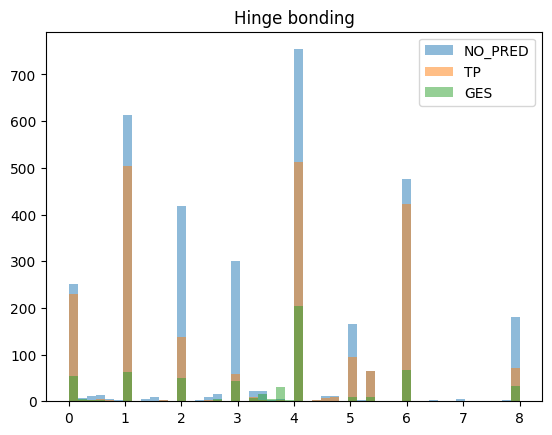

In [59]:
# plot the distribution of the number of each bonding divided on number of metal atoms
# 1) Hinge bonding
plt.figure()
plt.hist(df_filtered_nopred['morm hinge bond'], bins=50, alpha=0.5, label='NO_PRED')
plt.hist(df_filtered_tp['morm hinge bond'], bins=50, alpha=0.5, label='TP')
plt.hist(df_filtered_ges['morm hinge bond'], bins=50, alpha=0.5, label='GES')

plt.legend(loc='upper right')
plt.title('Hinge bonding')
plt.show()


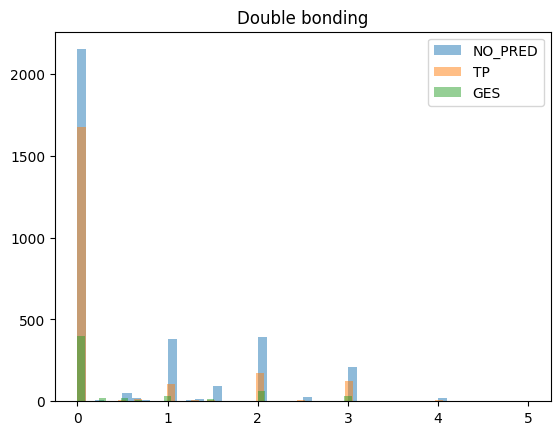

In [57]:
# 2) Double bonding
plt.figure()
plt.hist(df_filtered_nopred['morm double bond'], bins=50, alpha=0.5, label='NO_PRED')
plt.hist(df_filtered_tp['morm double bond'], bins=50, alpha=0.5, label='TP')
plt.hist(df_filtered_ges['morm double bond'], bins=50, alpha=0.5, label='GES')

plt.legend(loc='upper right')
plt.title('Double bonding')
plt.show()


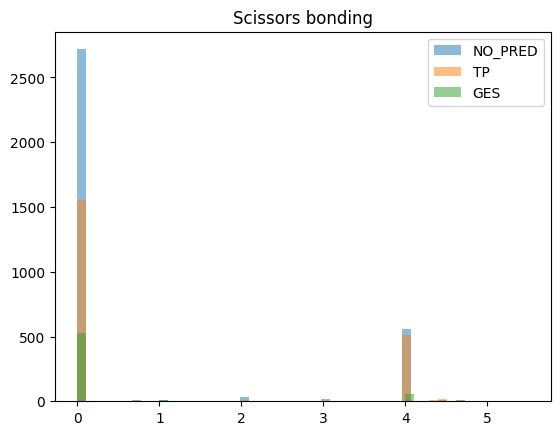

In [58]:
# 3) Scissors bonding
plt.figure()
plt.hist(df_filtered_nopred['morm scissors bond'], bins=50, alpha=0.5, label='NO_PRED')
plt.hist(df_filtered_tp['morm scissors bond'], bins=50, alpha=0.5, label='TP')
plt.hist(df_filtered_ges['morm scissors bond'], bins=50, alpha=0.5, label='GES')

plt.legend(loc='upper right')
plt.title('Scissors bonding')
plt.show()


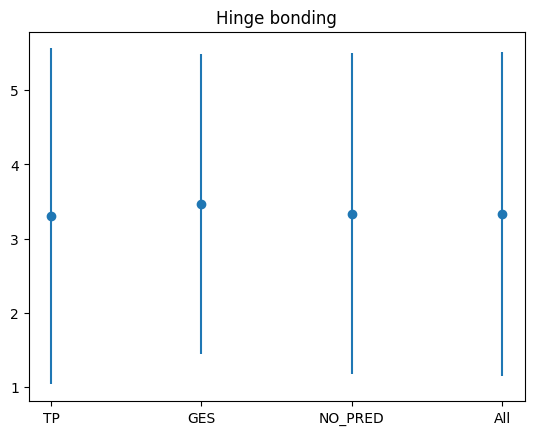

In [61]:
# plot mean and std of the number of each bonding divided on number of metal atoms
# 1) Hinge bonding
plt.figure()
plt.errorbar(['TP', 'GES', 'NO_PRED','All'], [df_filtered_tp['morm hinge bond'].mean(), df_filtered_ges['morm hinge bond'].mean(), df_filtered_nopred['morm hinge bond'].mean(), df_filtered['norm hinge bond'].mean()],
              [df_filtered_tp['morm hinge bond'].std(), df_filtered_ges['morm hinge bond'].std(), df_filtered_nopred['morm hinge bond'].std(),df_filtered['norm hinge bond'].std()], fmt='o')
plt.title('Hinge bonding')
plt.show()

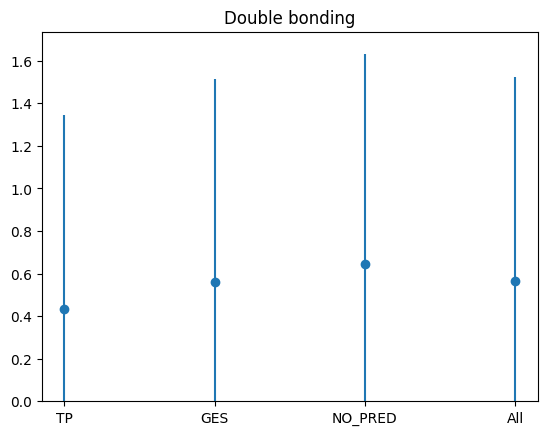

In [67]:
# 2) Double bonding
plt.figure()
plt.errorbar(['TP', 'GES', 'NO_PRED','All'], [df_filtered_tp['morm double bond'].mean(), df_filtered_ges['morm double bond'].mean(), df_filtered_nopred['morm double bond'].mean(), df_filtered['norm double bond'].mean()],
              [df_filtered_tp['morm double bond'].std(), df_filtered_ges['morm double bond'].std(), df_filtered_nopred['morm double bond'].std(),df_filtered['norm double bond'].std()], fmt='o')
plt.ylim(0,)
plt.title('Double bonding')
plt.show()

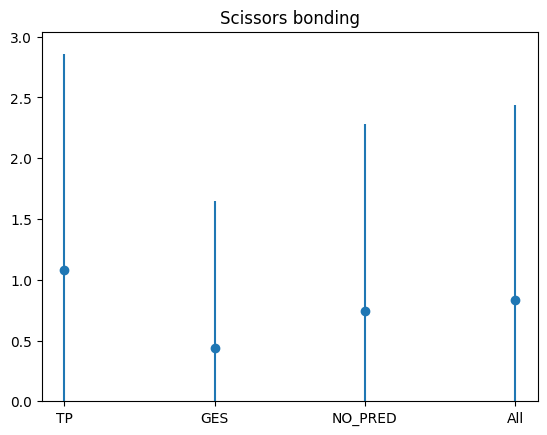

In [66]:
# 3) Scissors bonding (less than 0 is not possible)
plt.figure()
plt.errorbar(['TP', 'GES', 'NO_PRED','All'], [df_filtered_tp['morm scissors bond'].mean(), df_filtered_ges['morm scissors bond'].mean(), df_filtered_nopred['morm scissors bond'].mean(), df_filtered['norm scissors bond'].mean()],
              [df_filtered_tp['morm scissors bond'].std(), df_filtered_ges['morm scissors bond'].std(), df_filtered_nopred['morm scissors bond'].std(),df_filtered['norm scissors bond'].std()], fmt='o')
plt.ylim(0,)
plt.title('Scissors bonding')
plt.show()